In [34]:
import pandas as pd


data_path = "data"

In [35]:
# Read the file
df = pd.read_csv(f'{data_path}/MAX86177_20230801_235809.ppg.csv', header=32)
df

,timestamp,sampleNum,tagMEAS1_PPG1,tagMEAS1_PPG2,tagMEAS1_PPG3,tagMEAS1_PPG4,tagMEAS2_PPG1,tagMEAS2_PPG2,tagMEAS2_PPG3,tagMEAS2_PPG4,...,ACCX,ACCY,ACCZ,temperature,RTC,sensor,regAddr,val,I2Caddr,Unnamed: 27
0,1690927089895.778076,1.000000e+00,0_0,0_0,0_0,0_0,0_0,2_1,2_2,2_3,...,1687.0,2592.0,2351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1690927089903.555908,2.000000e+00,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1695.0,2564.0,2366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1690927089911.333984,3.000000e+00,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1705.0,2559.0,2359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1690927089919.111816,4.000000e+00,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1693.0,2581.0,2350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1690927089926.889893,5.000000e+00,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1697.0,2615.0,2361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8617,stop time,1.690927e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8618,elapsed capture time: 0h01m08s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8619,missed packet count: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8620,incorrect tag count: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# check is all the values in the timestamp column are integers
print(df['timestamp'].apply(lambda x: isinstance(x, float)).all())

# print values in the timestamp column that are not integers
print(df['timestamp'][~df['timestamp'].apply(lambda x: isinstance(x, int))])

False
0                 1690927089895.778076
1                 1690927089903.555908
2                 1690927089911.333984
3                 1690927089919.111816
4                 1690927089926.889893
                     ...              
8617                         stop time
8618    elapsed capture time: 0h01m08s
8619            missed packet count: 0
8620            incorrect tag count: 1
8621              vcpp parser 20220803
Name: timestamp, Length: 8622, dtype: object


In [37]:
# if timestamp is not numeric, convert it to numeric, if its not possible, drop the row
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])
df['timestamp']

0       1.690927e+12
1       1.690927e+12
2       1.690927e+12
3       1.690927e+12
4       1.690927e+12
            ...     
8612    1.690927e+12
8613    1.690927e+12
8614    1.690927e+12
8615    1.690927e+12
8616    1.690927e+12
Name: timestamp, Length: 8617, dtype: float64

In [38]:
# check is all the values in the timestamp column are integers
print(df['timestamp'].apply(lambda x: isinstance(x, float)).all())

True


In [19]:
df.describe()

,timestamp,sampleNum,MEAS1_PPG1,MEAS1_PPG2,MEAS1_PPG3,MEAS1_PPG4,MEAS2_PPG1,MEAS2_PPG2,MEAS2_PPG3,MEAS2_PPG4,ACCX,ACCY,ACCZ,temperature,RTC,sensor,regAddr,val,I2Caddr,Unnamed: 27
count,8.617000e+03,8617.000000,8617.000000,8617.000000,8617.000000,8617.000000,8617.000000,8617.000000,8617.000000,8617.000000,8617.000000,8617.000000,8617.000000,67.0,67.000000,0.0,0.0,0.0,0.0,0.0
mean,1.690927e+12,4309.000000,4981.230010,1585.266218,484.412905,1519.941511,72154.625508,51029.279099,23136.911686,15599.022514,1718.262736,2613.184751,2341.556574,0.0,35322.268657,NaN,NaN,NaN,NaN,NaN
std,1.934896e+04,2487.657968,103.602101,33.537907,10.497186,24.967097,725.076446,66.352277,27.838217,27.107809,11.487121,21.818147,15.628294,0.0,19959.210617,NaN,NaN,NaN,NaN,NaN
min,1.690927e+12,1.000000,0.000000,0.000000,0.000000,0.000000,6991.000000,50888.000000,23052.000000,15534.000000,1663.000000,2541.000000,2281.000000,0.0,1520.000000,NaN,NaN,NaN,NaN,NaN
25%,1.690927e+12,2155.000000,4940.000000,1568.000000,478.000000,1507.000000,72010.000000,50975.000000,23120.000000,15579.000000,1711.000000,2599.000000,2331.000000,0.0,18421.500000,NaN,NaN,NaN,NaN,NaN
50%,1.690927e+12,4309.000000,4995.000000,1591.000000,485.000000,1519.000000,72109.000000,51026.000000,23140.000000,15600.000000,1719.000000,2612.000000,2342.000000,0.0,35322.000000,NaN,NaN,NaN,NaN,NaN
75%,1.690927e+12,6463.000000,5050.000000,1608.000000,491.000000,1530.000000,72326.000000,51071.000000,23157.000000,15619.000000,1726.000000,2627.000000,2353.000000,0.0,52223.000000,NaN,NaN,NaN,NaN,NaN
max,1.690927e+12,8617.000000,5133.000000,1645.000000,508.000000,1579.000000,72593.000000,51213.000000,23212.000000,15671.000000,1757.000000,2709.000000,2390.000000,0.0,69124.000000,NaN,NaN,NaN,NaN,NaN


In [20]:
df[df['MEAS2_PPG1'] == df.MEAS2_PPG1.min()]

,timestamp,sampleNum,tagMEAS1_PPG1,tagMEAS1_PPG2,tagMEAS1_PPG3,tagMEAS1_PPG4,tagMEAS2_PPG1,tagMEAS2_PPG2,tagMEAS2_PPG3,tagMEAS2_PPG4,...,ACCX,ACCY,ACCZ,temperature,RTC,sensor,regAddr,val,I2Caddr,Unnamed: 27
0,1.690927e+12,1.0,0_0,0_0,0_0,0_0,0_0,2_1,2_2,2_3,...,1687.0,2592.0,2351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.tagMEAS1_PPG1.value_counts()

tagMEAS1_PPG1
1_0    8616
0_0       1
Name: count, dtype: int64

In [23]:
# drop the min value df.MEAS1_PPG1.min()
df = df[df.MEAS1_PPG1 != df.MEAS1_PPG1.min()]
df

,timestamp,sampleNum,tagMEAS1_PPG1,tagMEAS1_PPG2,tagMEAS1_PPG3,tagMEAS1_PPG4,tagMEAS2_PPG1,tagMEAS2_PPG2,tagMEAS2_PPG3,tagMEAS2_PPG4,...,ACCX,ACCY,ACCZ,temperature,RTC,sensor,regAddr,val,I2Caddr,Unnamed: 27
1,1.690927e+12,2.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1695.0,2564.0,2366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.690927e+12,3.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1705.0,2559.0,2359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.690927e+12,4.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1693.0,2581.0,2350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.690927e+12,5.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1697.0,2615.0,2361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.690927e+12,6.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1690.0,2637.0,2375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,1.690927e+12,8613.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1698.0,2616.0,2329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8613,1.690927e+12,8614.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1720.0,2619.0,2343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8614,1.690927e+12,8615.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1732.0,2630.0,2353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8615,1.690927e+12,8616.0,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1734.0,2629.0,2361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


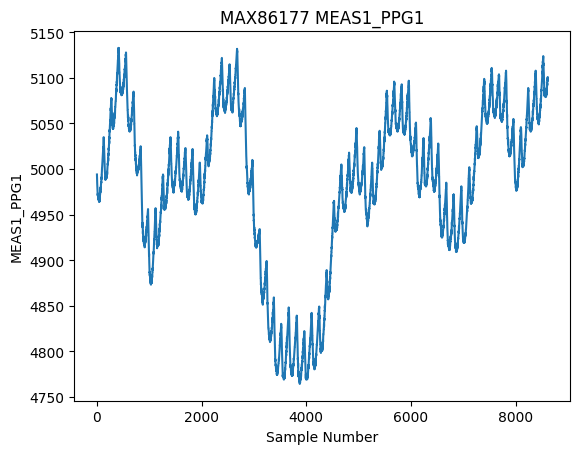

In [28]:
# Plot the line plot
plt.plot(df['sampleNum'], df['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Sample Number')
plt.show()

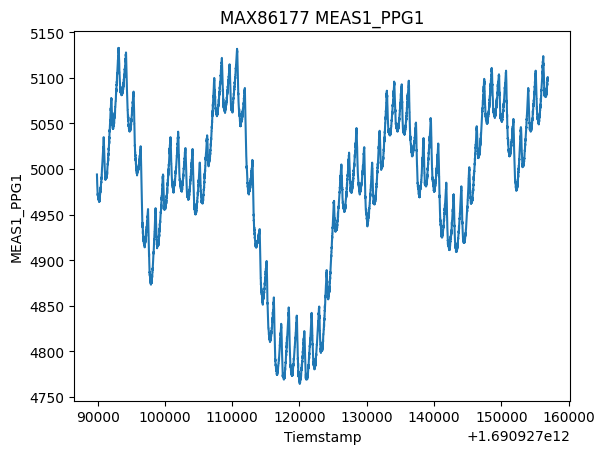

In [27]:
import matplotlib.pyplot as plt

# Plot the line plot
plt.plot(df['timestamp'], df['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Tiemstamp')
plt.show()

In [11]:
# get the time between each sample
df['timestamp'].diff().unique()

array([       nan, 7.77783203, 7.77807617, 7.77758789, 7.77832031])

In [1]:
import itertools

def kolmogorov_complexity(signal):
  """
  This function calculates the Kolmogorov complexity of a signal.

  Args:
    signal: The signal to be analyzed.

  Returns:
    The Kolmogorov complexity of the signal.
  """

  # Initialize the minimum description length.
  min_description_length = float("inf")

  # Iterate over all possible descriptions of the signal.
  for description in all_possible_descriptions(signal):
    # Calculate the length of the description.
    description_length = len(description)

    # If the description is shorter than the minimum description length, update the minimum description length.
    if description_length < min_description_length:
      min_description_length = description_length

  # Return the minimum description length.
  return min_description_length


def all_possible_descriptions(signal):
  """
  This function generates all possible descriptions of a signal.

  Args:
    signal: The signal to be analyzed.

  Returns:
    A list of all possible descriptions of the signal.
  """

  # Initialize the list of all possible descriptions.
  all_possible_descriptions = []

  # Iterate over all possible lengths of descriptions.
  for length in range(len(signal)):
    # Iterate over all possible combinations of symbols for each length.
    for combination in itertools.combinations(signal, length):
      # Add the combination to the list of all possible descriptions.
      all_possible_descriptions.append(combination)

  # Return the list of all possible descriptions.
  return all_possible_descriptions


In [ ]:
sig